In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# local_path = '/Users/juniorcedrictonga/Documents/pgm/Score-matching-project-'
local_path = '/Users/halvardbariller/Desktop/M2_MVA/_SEMESTER_1/PGM/Project/Score-matching-project-'
sys.path.append(local_path)

%load_ext autoreload
%autoreload 2

import dataset
from dataset import sampling, densities, scores, visualisation
import score_matching
from score_matching import toy_models, learning_objectives, score_visualisation
import mcmc_sampling
from mcmc_sampling import langevin, dynamics_plot, interacting_mcmc


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### GMM

In [2]:
# Parameters
N = 10000
mus = [np.array([0, 0]), np.array([10,10])]
sigmas = [np.eye(2), np.eye(2)]
alphas = [0.2, 0.8]

# Dataset
gmm_data, clusters = sampling.gaussian_mixture_sampling(mus, sigmas, alphas, N)

## NCSN : impact of differents level of noises

## L=1

In [3]:
num_levels = 1

In [4]:
# Parameters

learning_rate = 1e-3
num_epochs = 1000

sigma_begin = 1 
sigma_end = 0.01

## vector of num_classes of sigmas to use for data pertubation 
noise_levels = torch.tensor(np.exp(np.linspace(np.log(sigma_begin), np.log(sigma_end), num_levels))).float() 

# Our approximation model
ncsn_1_noise = toy_models.ConditionalModel(num_levels)

# Learning objective
optimizer = torch.optim.Adam(ncsn_1_noise.parameters(), lr=learning_rate)
ScoreMatching = learning_objectives.ScoreMatching(optimizer, 'anneal_denoising_score_matching', device, sigma = noise_levels) # sigmas here is for data's pertubation 

# Training
ScoreMatching.train(gmm_data, ncsn_1_noise, num_epochs, verbose=False, plot=False)

100%|██████████| 1000/1000 [00:14<00:00, 67.20it/s]

Training finished!


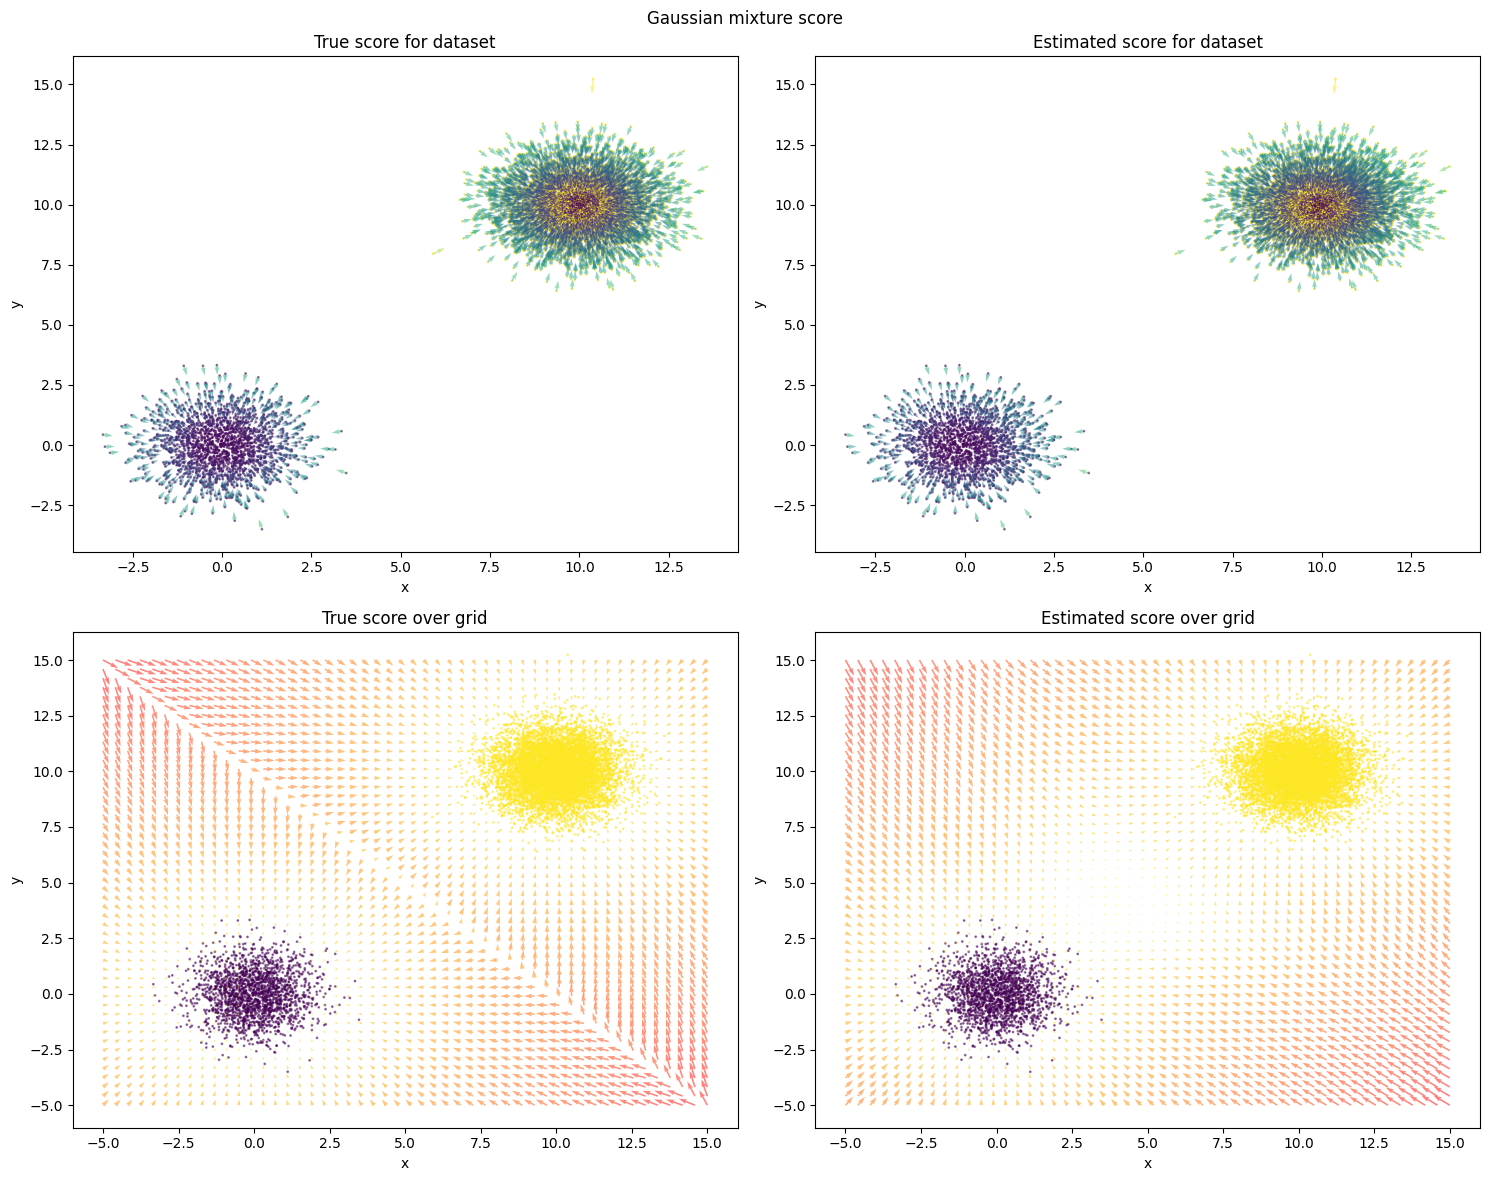

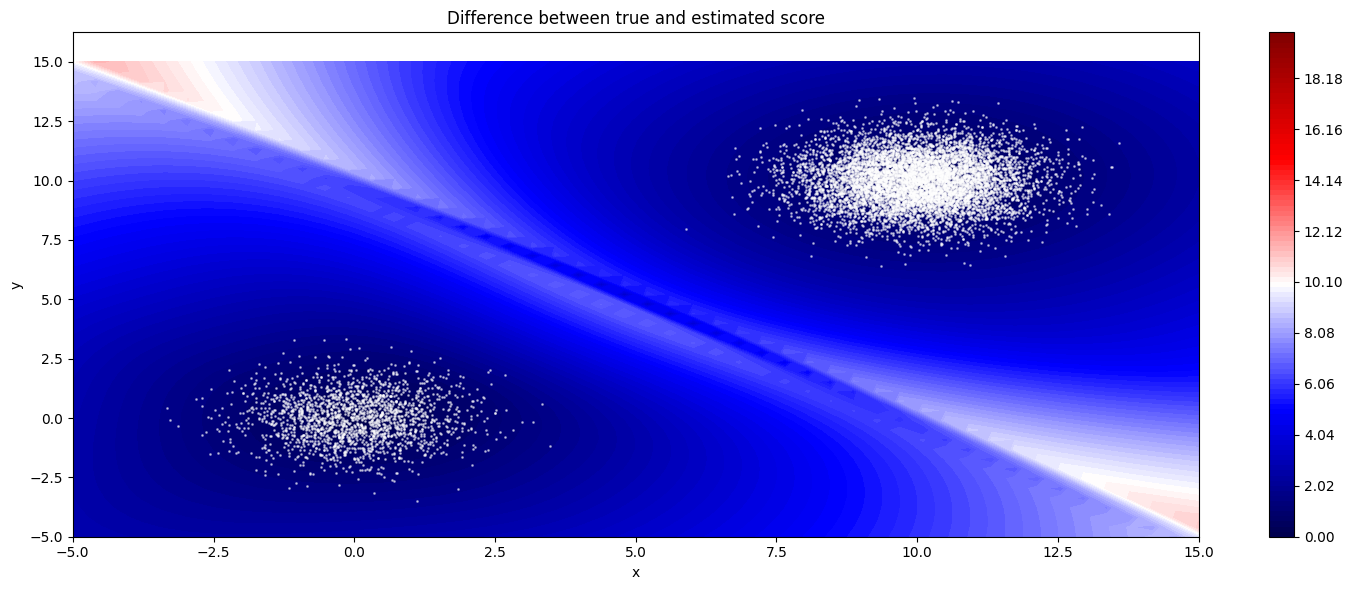

In [5]:
score_visualisation.plot_estimated_score_gmm(gmm_data, clusters, ncsn_1_noise, mus, sigmas, alphas, difference=True, 
                                             type='anneal_denoising_score_matching',sigma_list=noise_levels)

In [6]:
step = 1e-4
iterations = 300
n_samples = 10000

target_samples_annealed, hist_samples_annealed = interacting_mcmc.annealed_langevin(ncsn_1_noise, step, noise_levels, 
                                                                                    iterations, n_samples, **{'data_type':'gmm'})

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


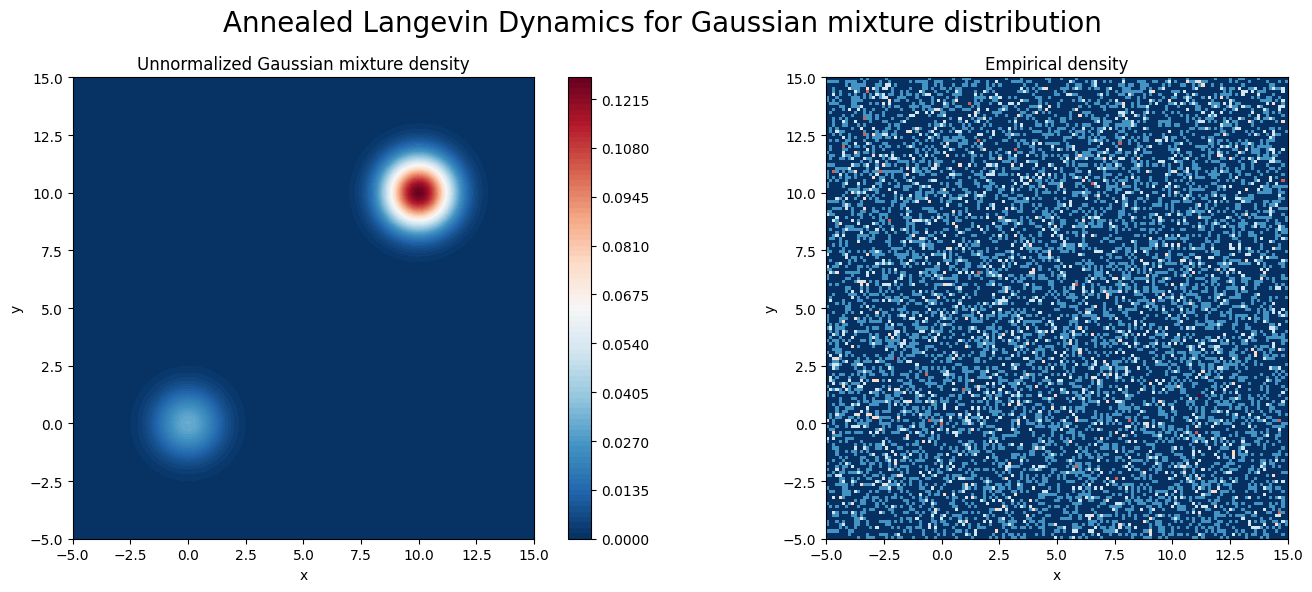

In [7]:
dynamics_plot.langevin_sampling_gmm(target_samples_annealed, mus, sigmas, alphas, annealed=True)

## L=2

In [8]:
num_levels = 2

In [9]:
# Parameters

learning_rate = 1e-3
num_epochs = 1000

sigma_begin = 1 
sigma_end = 0.01

## vector of num_classes of sigmas to use for data pertubation 
noise_levels = torch.tensor(np.exp(np.linspace(np.log(sigma_begin), np.log(sigma_end), num_levels))).float() 

# Our approximation model
ncsn_2_noise = toy_models.ConditionalModel(num_levels)

# Learning objective
optimizer = torch.optim.Adam(ncsn_2_noise.parameters(), lr=learning_rate)
ScoreMatching = learning_objectives.ScoreMatching(optimizer, 'anneal_denoising_score_matching', device, sigma = noise_levels) # sigmas here is for data's pertubation 

# Training
ScoreMatching.train(gmm_data, ncsn_2_noise, num_epochs, verbose=False, plot=False)

100%|██████████| 1000/1000 [00:17<00:00, 58.26it/s]

Training finished!


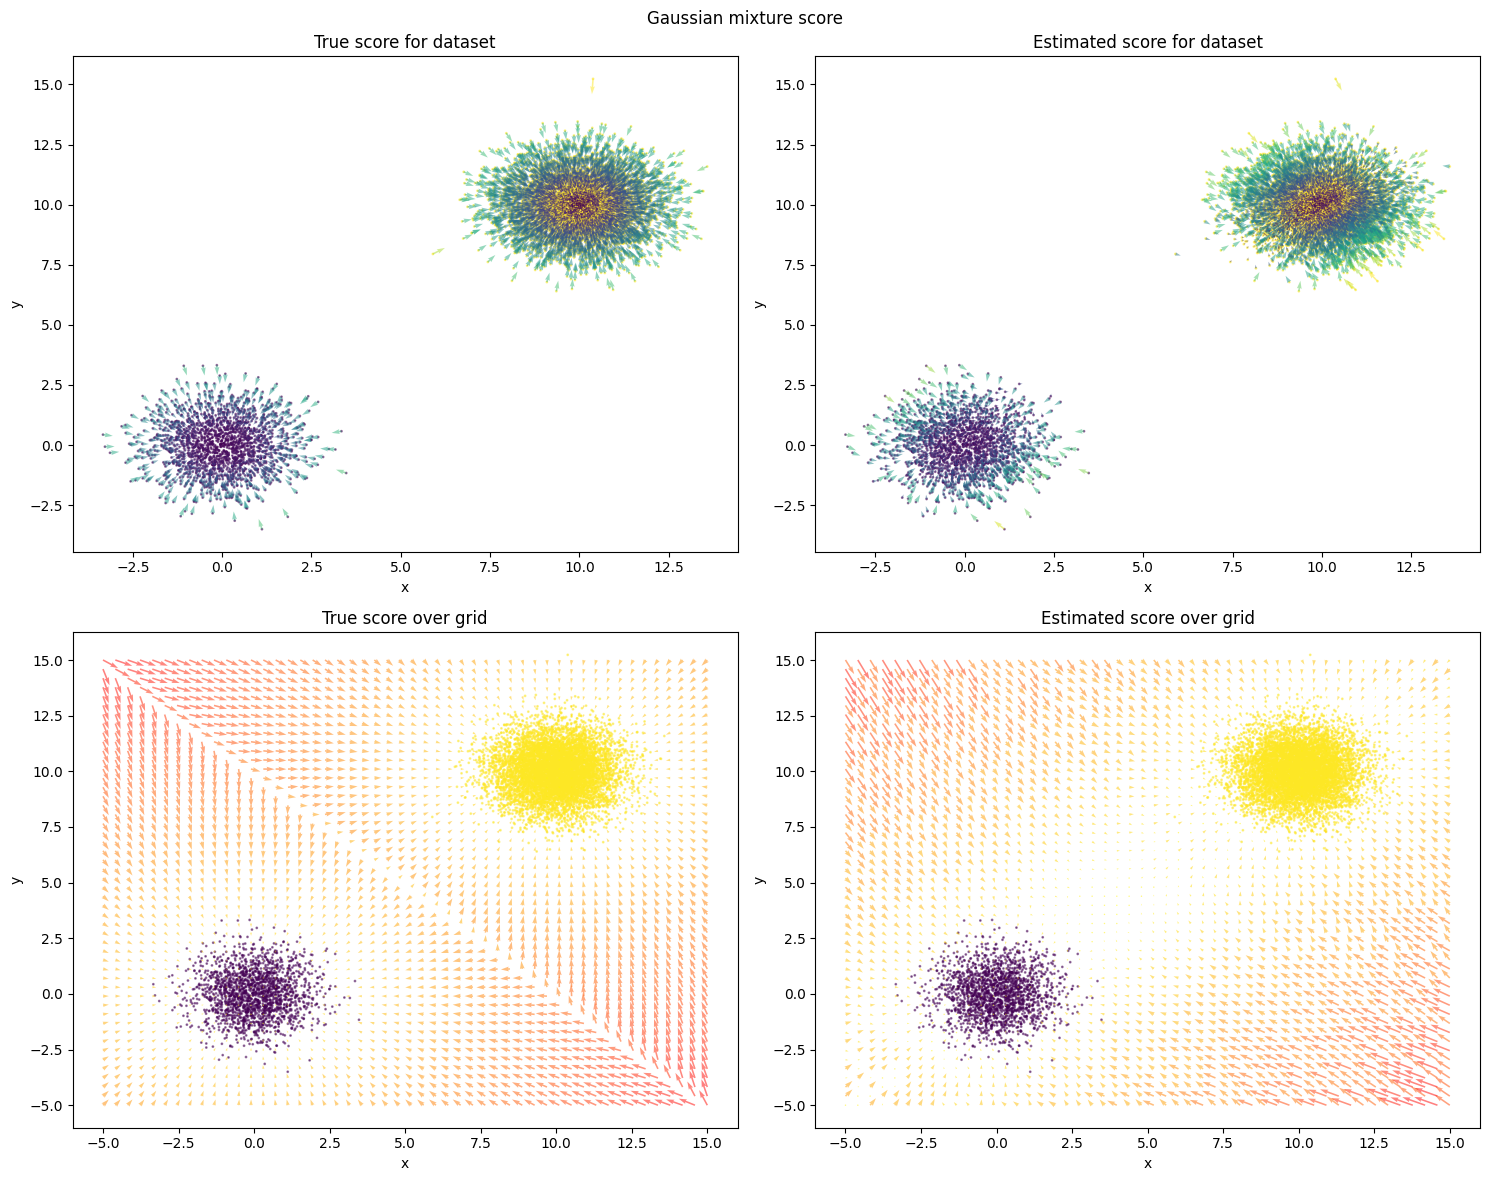

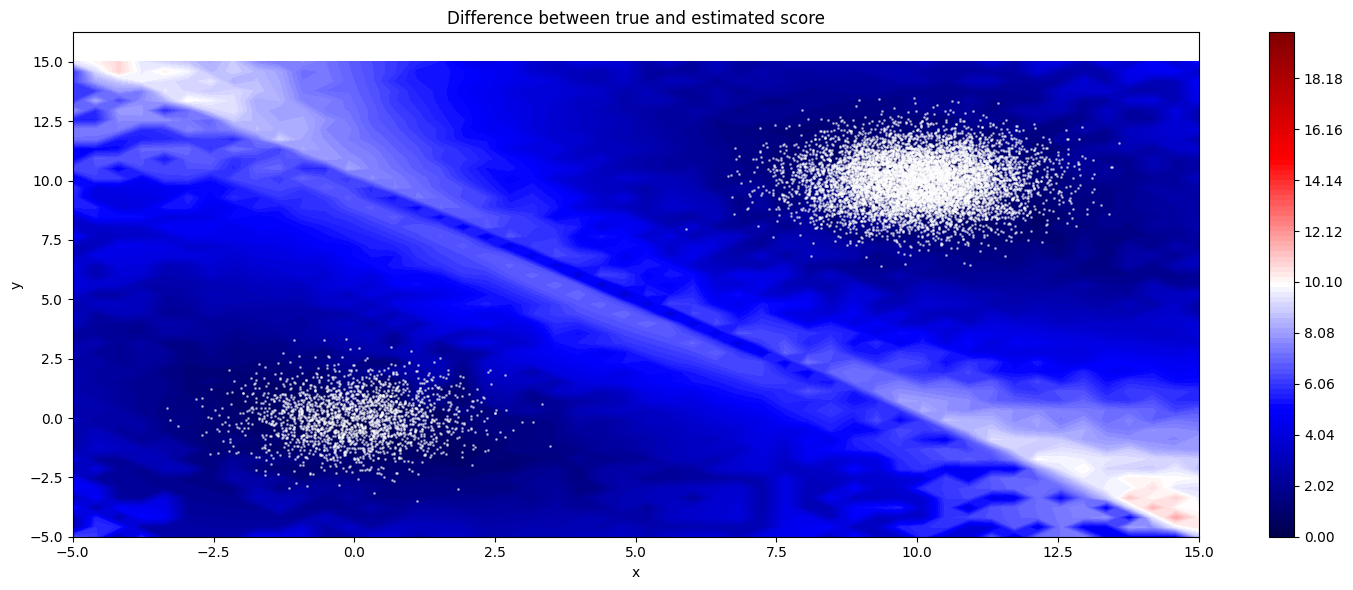

In [10]:
score_visualisation.plot_estimated_score_gmm(gmm_data, clusters, ncsn_2_noise, mus, sigmas, alphas, difference=True, 
                                             type='anneal_denoising_score_matching',sigma_list=noise_levels)

In [11]:
step = 1e-4
iterations = 300
n_samples = 10000

target_samples_annealed, hist_samples_annealed = interacting_mcmc.annealed_langevin(ncsn_2_noise, step, noise_levels, 
                                                                                    iterations, n_samples, **{'data_type':'gmm'})

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:05<00:00,  2.62s/it]


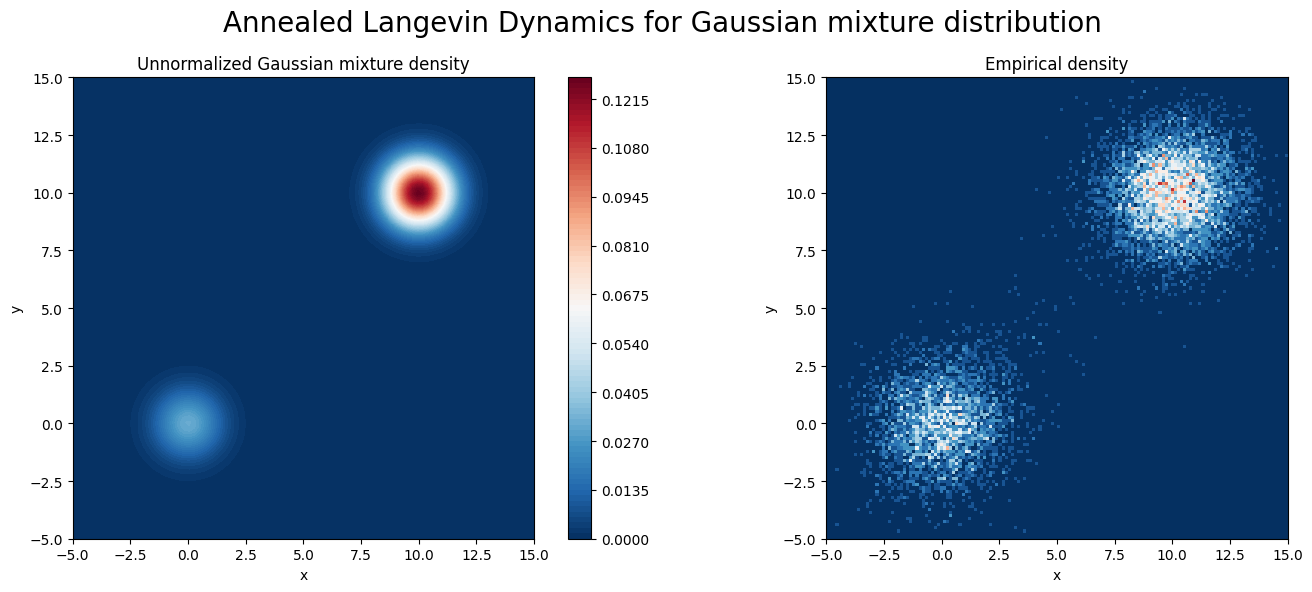

In [12]:
dynamics_plot.langevin_sampling_gmm(target_samples_annealed, mus, sigmas, alphas, annealed=True)

## L=5

In [13]:
num_levels = 5

In [14]:
# Parameters

learning_rate = 1e-3
num_epochs = 1000

sigma_begin = 1 
sigma_end = 0.01

## vector of num_classes of sigmas to use for data pertubation 
noise_levels = torch.tensor(np.exp(np.linspace(np.log(sigma_begin), np.log(sigma_end), num_levels))).float() 

# Our approximation model
ncsn_5_noise = toy_models.ConditionalModel(num_levels)

# Learning objective
optimizer = torch.optim.Adam(ncsn_5_noise.parameters(), lr=learning_rate)
ScoreMatching = learning_objectives.ScoreMatching(optimizer, 'anneal_denoising_score_matching', device, sigma = noise_levels) # sigmas here is for data's pertubation 

# Training
ScoreMatching.train(gmm_data, ncsn_5_noise, num_epochs, verbose=False, plot=False)

100%|██████████| 1000/1000 [00:16<00:00, 60.00it/s]

Training finished!


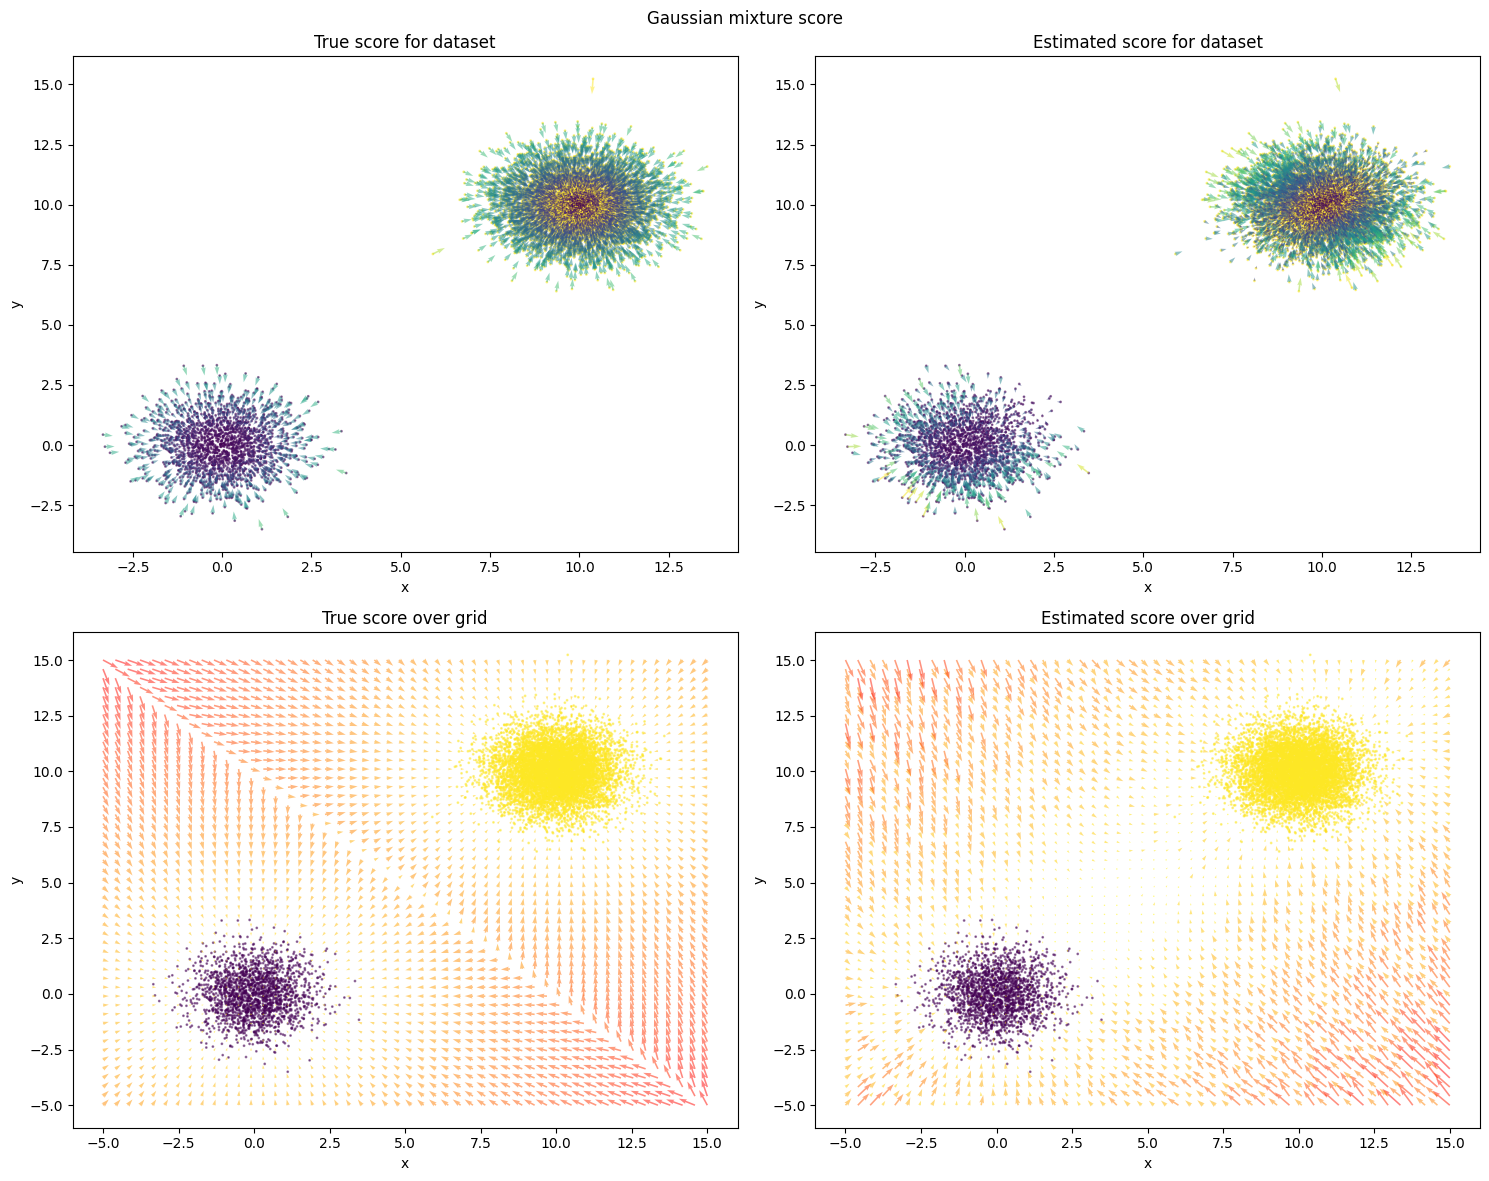

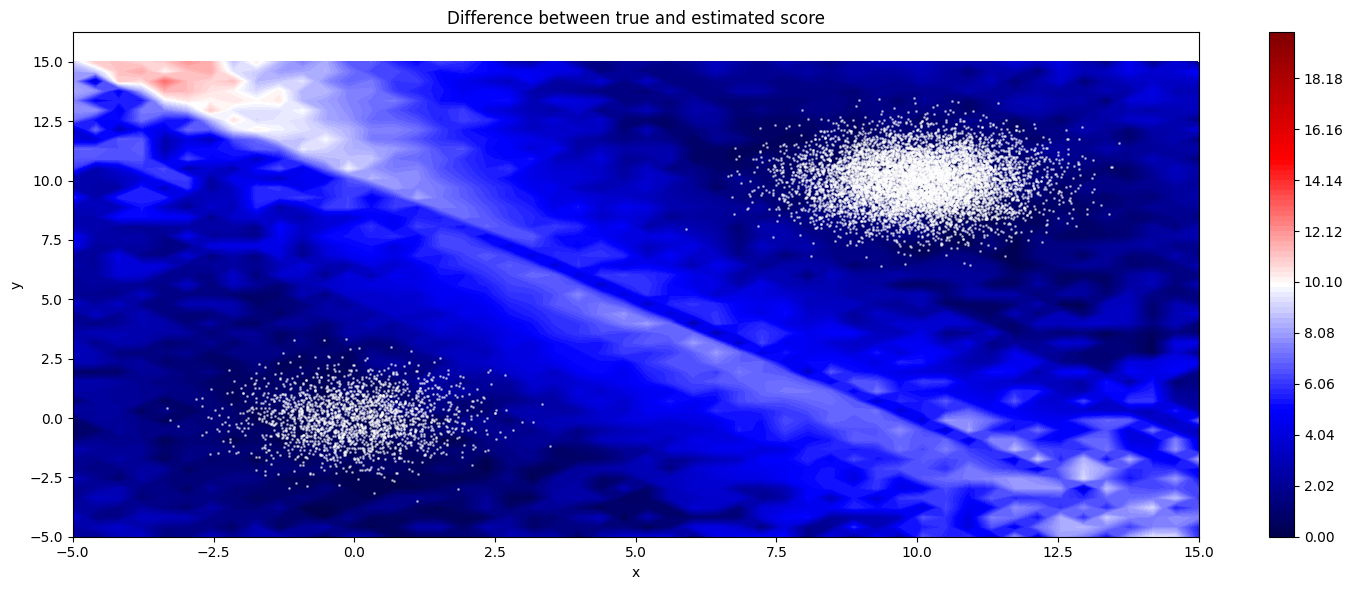

In [15]:
score_visualisation.plot_estimated_score_gmm(gmm_data, clusters, ncsn_5_noise, mus, sigmas, alphas, difference=True, 
                                             type='anneal_denoising_score_matching',sigma_list=noise_levels)

In [16]:
step = 1e-4
iterations = 300
n_samples = 10000

target_samples_annealed, hist_samples_annealed = interacting_mcmc.annealed_langevin(ncsn_5_noise, step, noise_levels, 
                                                                                    iterations, n_samples, **{'data_type':'gmm'})

100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


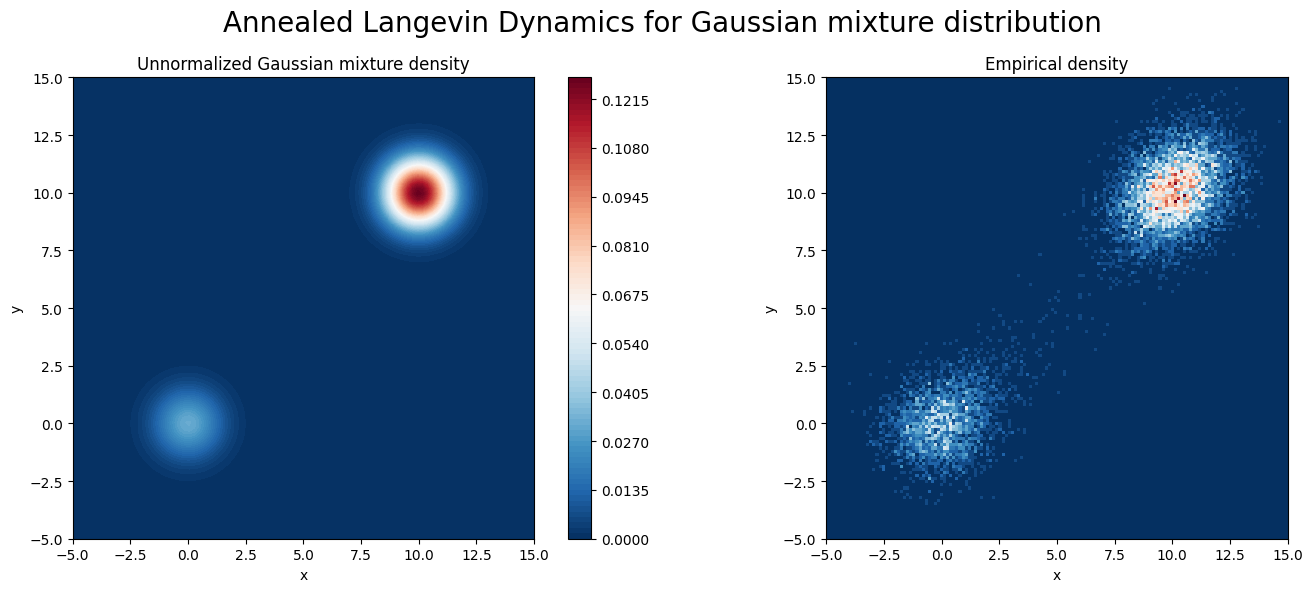

In [17]:
dynamics_plot.langevin_sampling_gmm(target_samples_annealed, mus, sigmas, alphas, annealed=True)

## L=10

In [18]:
num_levels = 10

In [19]:
# Parameters

learning_rate = 1e-3
num_epochs = 1000

sigma_begin = 1 
sigma_end = 0.01

## vector of num_classes of sigmas to use for data pertubation 
noise_levels = torch.tensor(np.exp(np.linspace(np.log(sigma_begin), np.log(sigma_end), num_levels))).float() 

# Our approximation model
ncsn_10_noise = toy_models.ConditionalModel(num_levels)

# Learning objective
optimizer = torch.optim.Adam(ncsn_10_noise.parameters(), lr=learning_rate)
ScoreMatching = learning_objectives.ScoreMatching(optimizer, 'anneal_denoising_score_matching', device, sigma = noise_levels) # sigmas here is for data's pertubation 

# Training
ScoreMatching.train(gmm_data, ncsn_10_noise, num_epochs, verbose=False, plot=False)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:16<00:00, 61.23it/s]

Training finished!


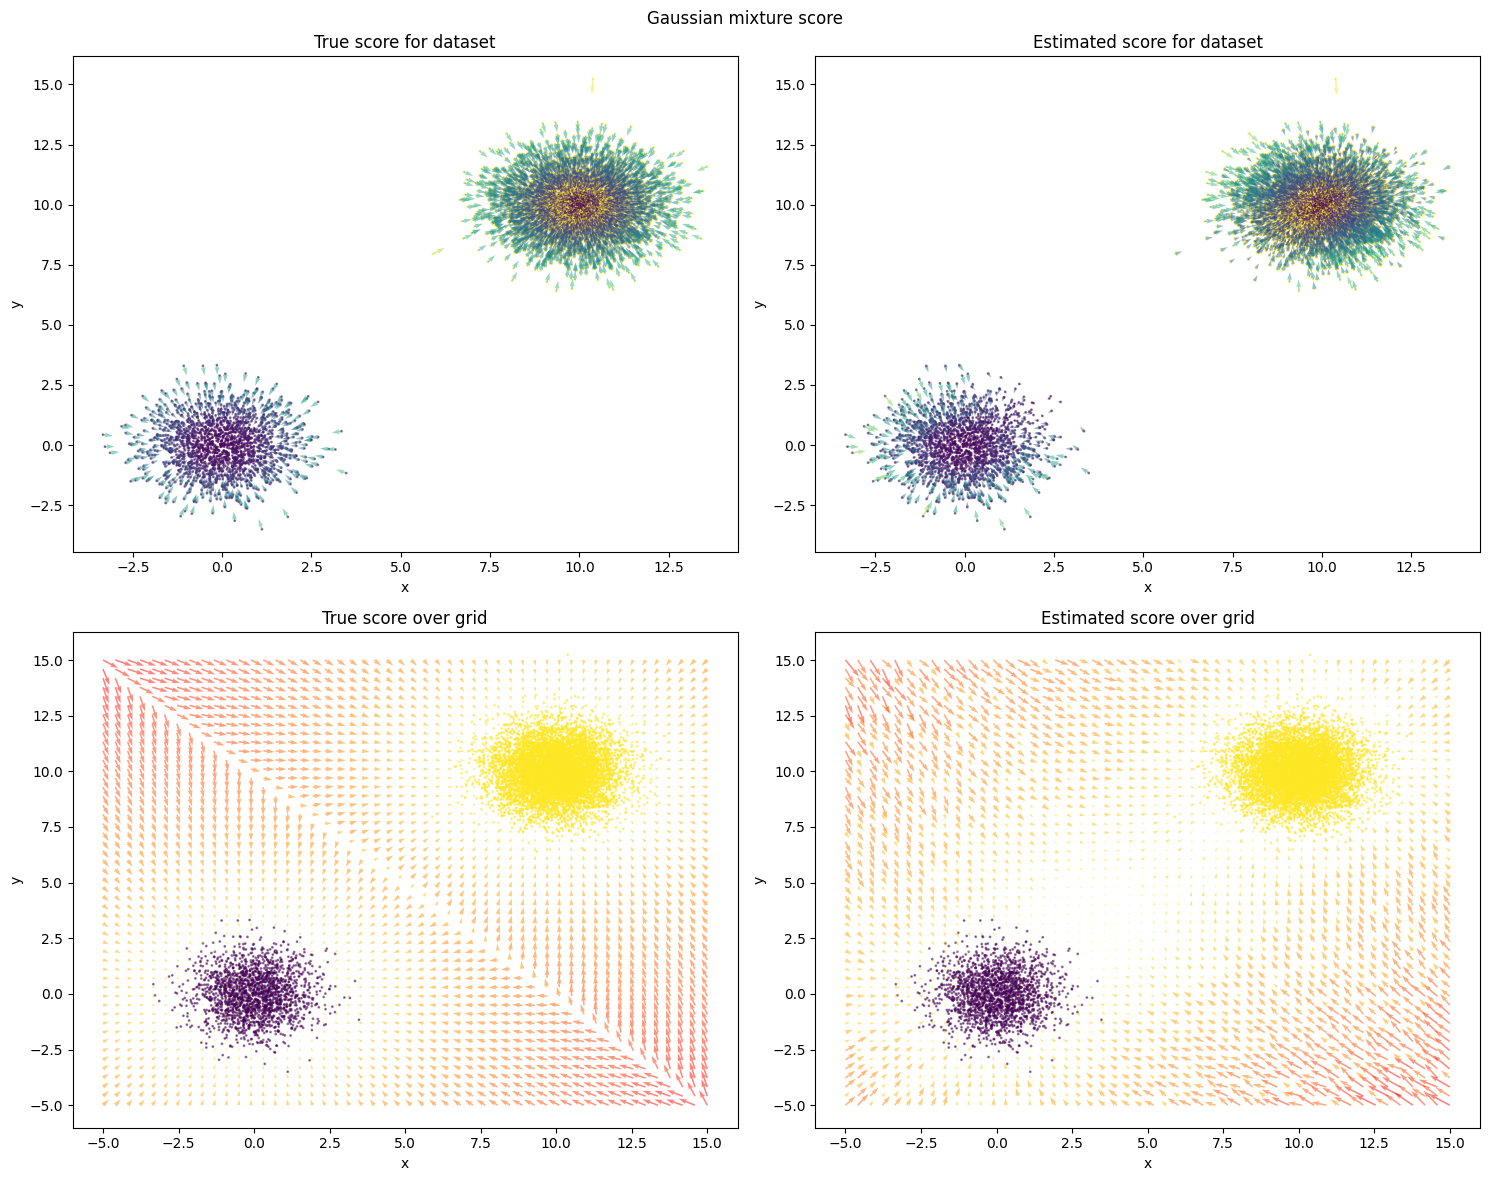

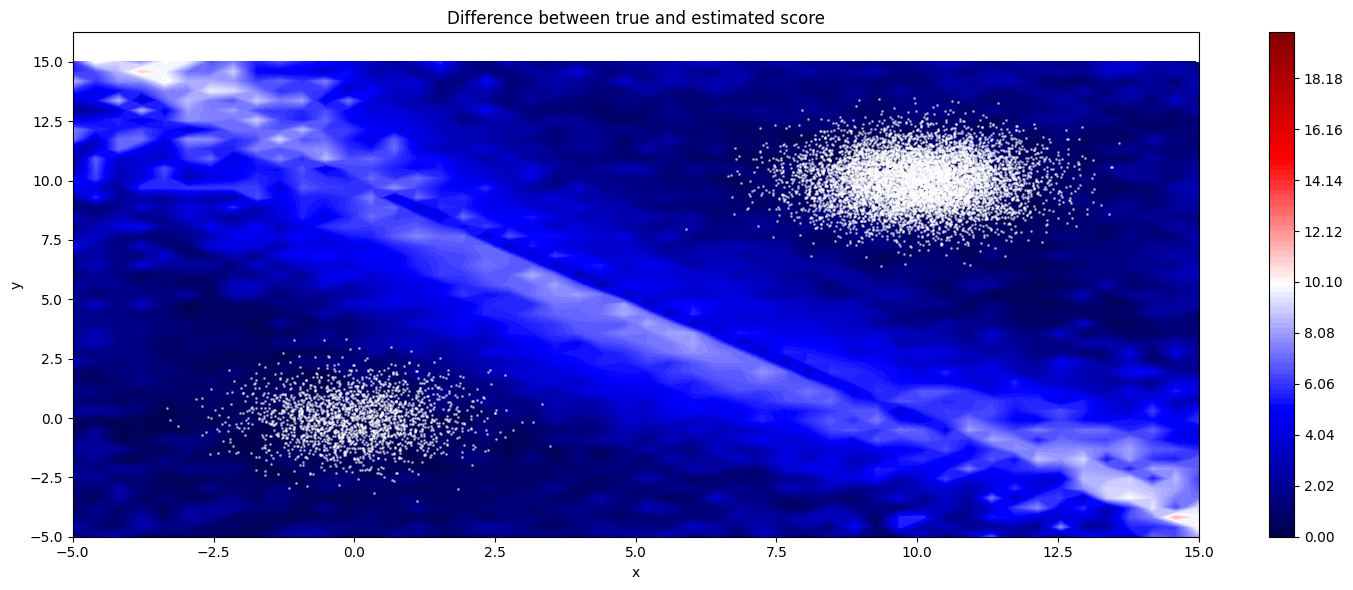

In [20]:
score_visualisation.plot_estimated_score_gmm(gmm_data, clusters, ncsn_10_noise, mus, sigmas, alphas, difference=True, 
                                             type='anneal_denoising_score_matching',sigma_list=noise_levels)

In [21]:
step = 1e-4
iterations = 300
n_samples = 10000

target_samples_annealed, hist_samples_annealed = interacting_mcmc.annealed_langevin(ncsn_10_noise, step, noise_levels, 
                                                                                    iterations, n_samples, **{'data_type':'gmm'})

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:25<00:00,  2.59s/it]


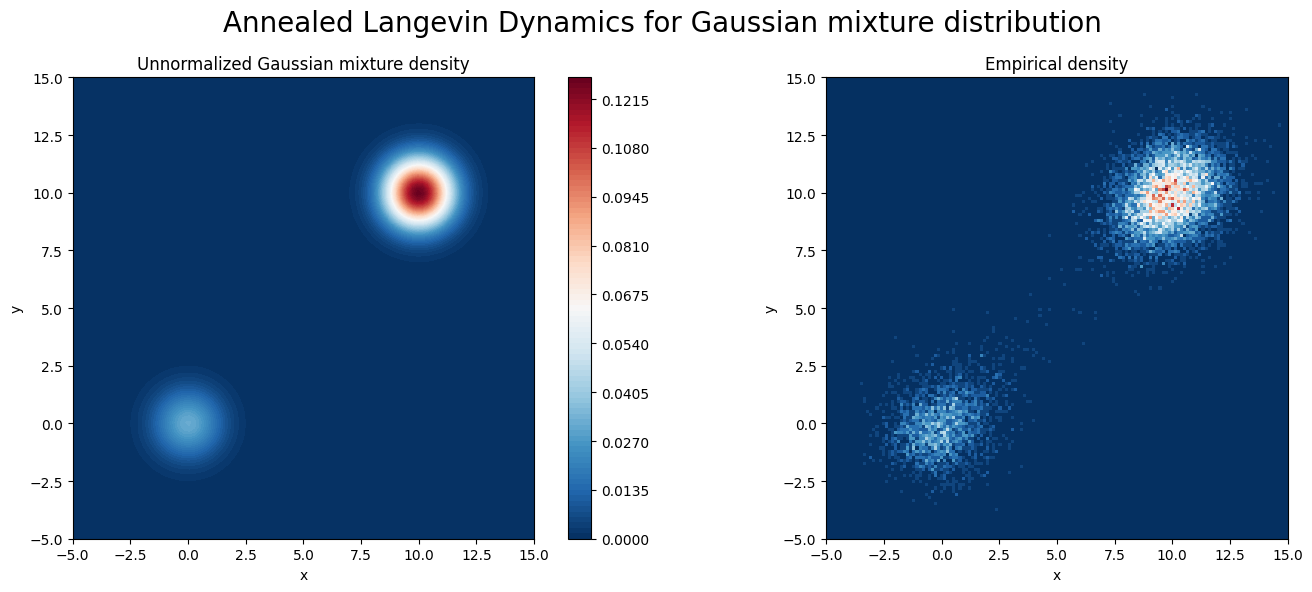

In [22]:
dynamics_plot.langevin_sampling_gmm(target_samples_annealed, mus, sigmas, alphas, annealed=True)

## L=20

In [23]:
num_levels = 20

In [24]:
# Parameters

learning_rate = 1e-3
num_epochs = 1000

sigma_begin = 1 
sigma_end = 0.01

## vector of num_classes of sigmas to use for data pertubation 
noise_levels = torch.tensor(np.exp(np.linspace(np.log(sigma_begin), np.log(sigma_end), num_levels))).float() 

# Our approximation model
ncsn_20_noise = toy_models.ConditionalModel(num_levels)

# Learning objective
optimizer = torch.optim.Adam(ncsn_1_noise.parameters(), lr=learning_rate)
ScoreMatching = learning_objectives.ScoreMatching(optimizer, 'anneal_denoising_score_matching', device, sigma = noise_levels) # sigmas here is for data's pertubation 

# Training
ScoreMatching.train(gmm_data, ncsn_20_noise, num_epochs, verbose=False, plot=False)

100%|██████████| 1000/1000 [00:16<00:00, 59.98it/s]

Training finished!


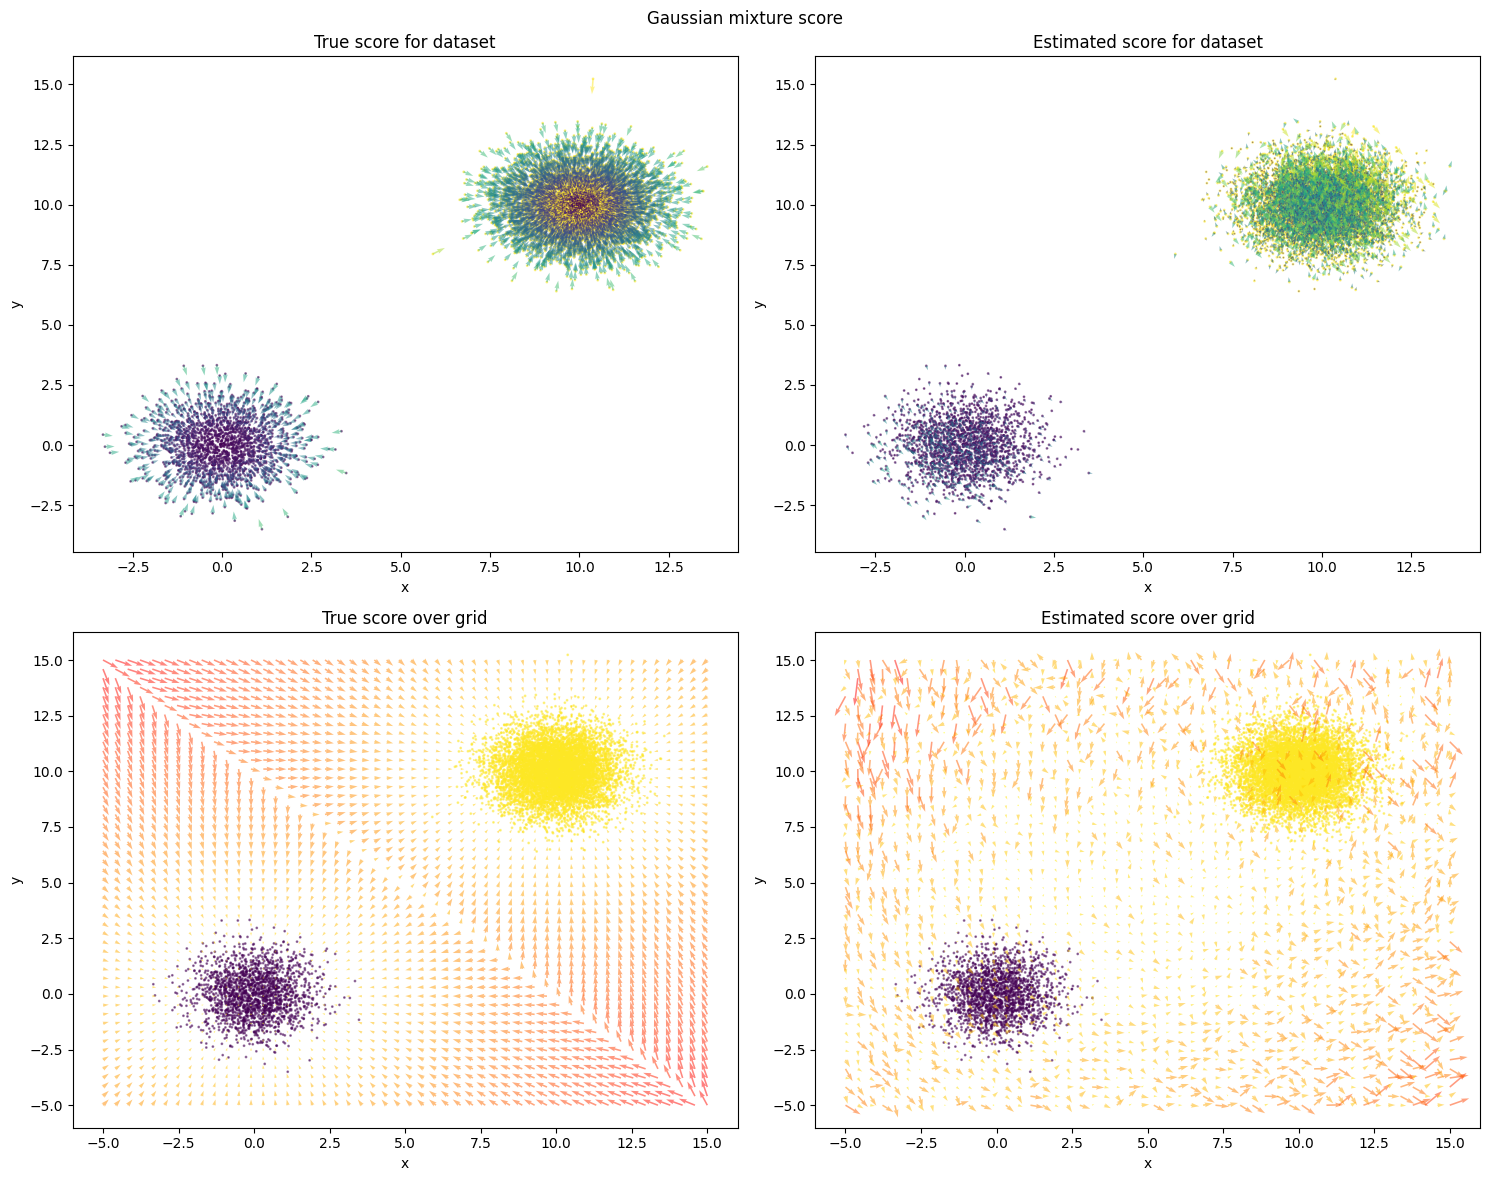

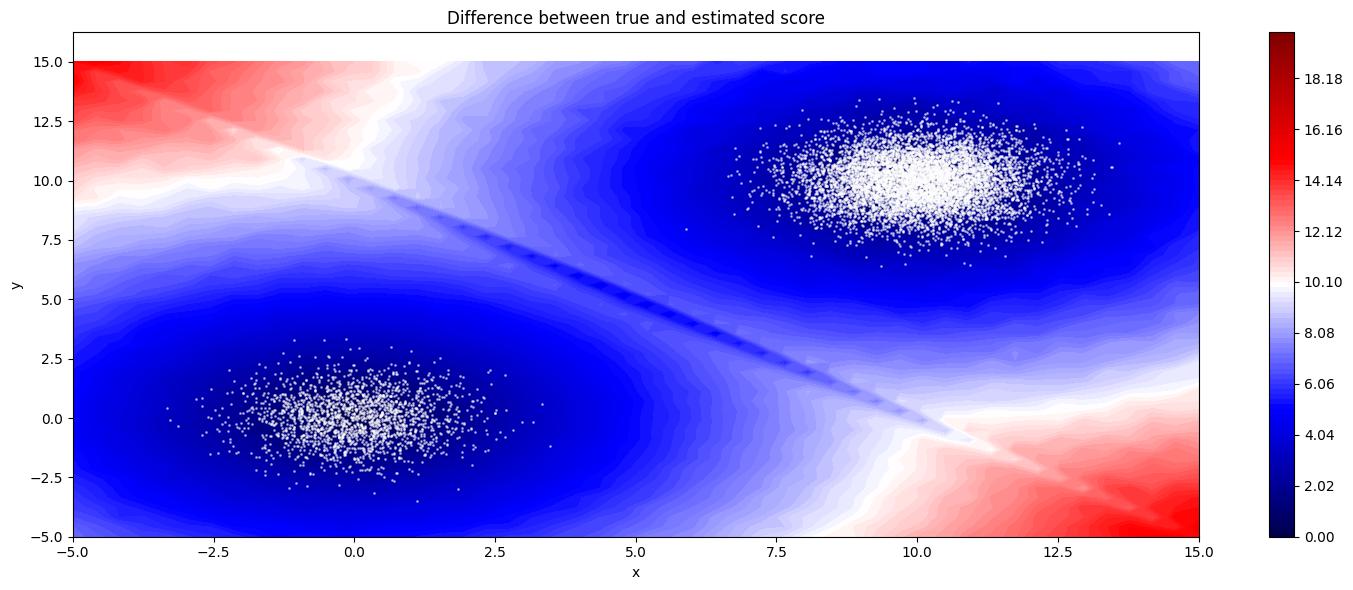

In [25]:
score_visualisation.plot_estimated_score_gmm(gmm_data, clusters, ncsn_20_noise, mus, sigmas, alphas, difference=True, 
                                             type='anneal_denoising_score_matching',sigma_list=noise_levels)

In [26]:
step = 1e-4
iterations = 300
n_samples = 10000

target_samples_annealed, hist_samples_annealed = interacting_mcmc.annealed_langevin(ncsn_20_noise, step, noise_levels, 
                                                                                    iterations, n_samples, **{'data_type':'gmm'})

100%|██████████| 20/20 [00:49<00:00,  2.47s/it]


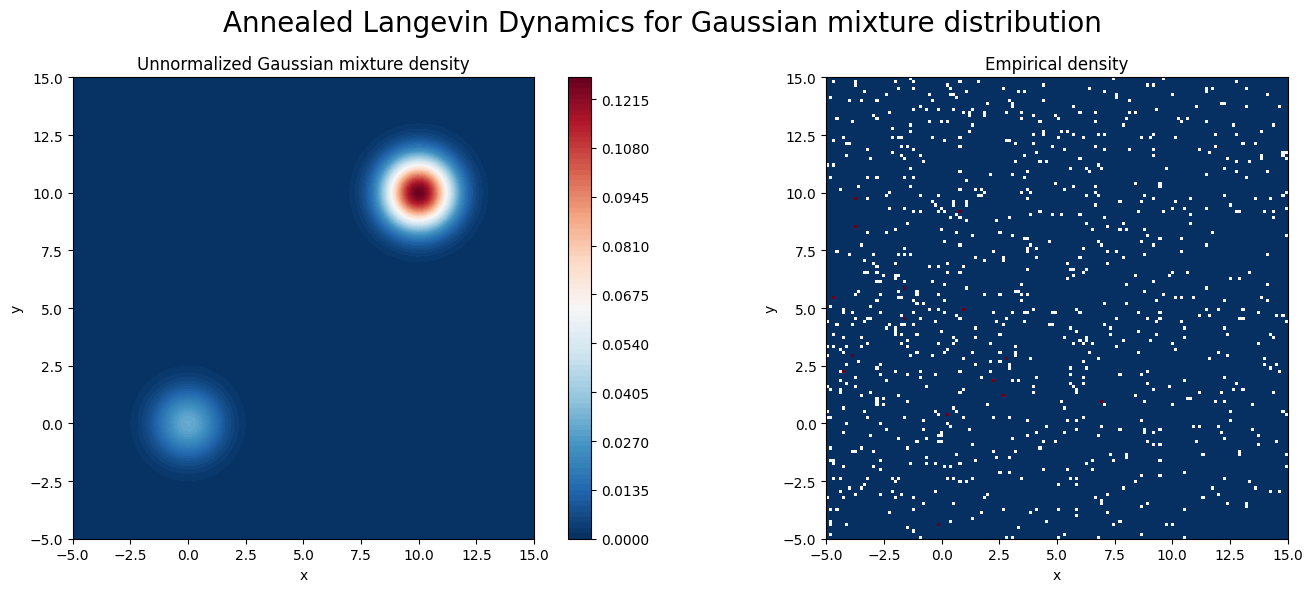

In [27]:
dynamics_plot.langevin_sampling_gmm(target_samples_annealed, mus, sigmas, alphas, annealed=True)

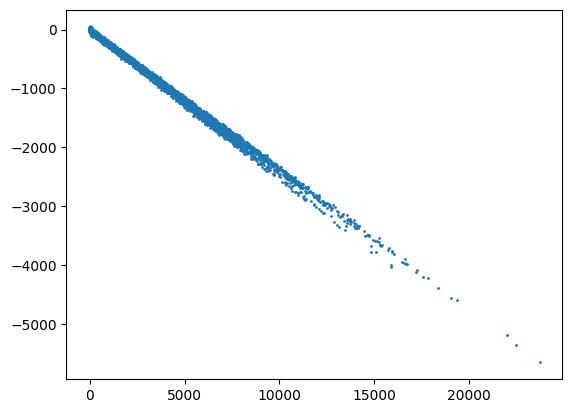

In [28]:
plt.scatter(target_samples_annealed[:,0], target_samples_annealed[:,1], s=1)